# K-Mode Clustering on Bank Marketing Dataset

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

Attribute Information(Categorical):

age (numeric)

job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

default: has credit in default? (categorical: 'no','yes','unknown')
housing: has housing loan? (categorical: 'no','yes','unknown')

loan: has personal loan? (categorical: 'no','yes','unknown')
contact: contact communication type (categorical: 'cellular','telephone')
month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


In [173]:
! pip install kmodes

### 1. Read and visualise the data

In [174]:
# Importing Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from kmodes.kmodes import KModes
import warnings
warnings.filterwarnings("ignore")

In [176]:
help(KModes)

Help on class KModes in module kmodes.kmodes:

class KModes(sklearn.base.BaseEstimator, sklearn.base.ClusterMixin)
 |  KModes(n_clusters=8, max_iter=100, cat_dissim=<function matching_dissim at 0x7c37d1038ee0>, init='Cao', n_init=10, verbose=0, random_state=None, n_jobs=1)
 |  
 |  k-modes clustering algorithm for categorical data.
 |  
 |  Parameters
 |  -----------
 |  n_clusters : int, optional, default: 8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  max_iter : int, default: 100
 |      Maximum number of iterations of the k-modes algorithm for a
 |      single run.
 |  
 |  cat_dissim : func, default: matching_dissim
 |      Dissimilarity function used by the k-modes algorithm for categorical variables.
 |      Defaults to the matching dissimilarity function.
 |  
 |  init : {'Huang', 'Cao', 'random' or an ndarray}, default: 'Cao'
 |      Method for initialization:
 |      'Huang': Method in Huang [1997, 1998]
 |      'Cao':

In [177]:
# read the dataset

bank = pd.read_csv('bankmarketing.csv')
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [178]:
bank.shape

(41188, 21)

In [179]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [180]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [181]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [182]:
# Loop through columns and calculate value counts
for column in bank.columns:
    value_counts = bank[column].value_counts()
    print(f"Value counts for {column}:")
    print(value_counts)
    print()

Value counts for age:
age
31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: count, Length: 78, dtype: int64

Value counts for job:
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

Value counts for marital:
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

Value counts for education:
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

Value counts for default:
default
no         32588
unkn

In [183]:
bank_cust = bank[['age','job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','day_of_week','poutcome']]

In [184]:
bank_cust.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,37,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,56,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [185]:
bank_cust['age_bin'] = pd.cut(bank_cust['age'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])

In [186]:
bank_cust.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,50-60
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,50-60
2,37,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,30-40
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,30-40
4,56,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,50-60


In [187]:
bank_cust  = bank_cust.drop('age',axis = 1)

In [188]:
bank_cust.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,50-60
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,50-60
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,30-40
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,30-40
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,50-60


In [189]:
bank_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   job          41188 non-null  object  
 1   marital      41188 non-null  object  
 2   education    41188 non-null  object  
 3   default      41188 non-null  object  
 4   housing      41188 non-null  object  
 5   loan         41188 non-null  object  
 6   contact      41188 non-null  object  
 7   month        41188 non-null  object  
 8   day_of_week  41188 non-null  object  
 9   poutcome     41188 non-null  object  
 10  age_bin      41188 non-null  category
dtypes: category(1), object(10)
memory usage: 3.2+ MB


In [191]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
bank_cust = bank_cust.apply(le.fit_transform)
bank_cust.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,3,1,0,0,0,0,1,6,1,1,4
1,7,1,3,1,0,0,1,6,1,1,4
2,7,1,3,0,2,0,1,6,1,1,2
3,0,1,1,0,0,0,1,6,1,1,2
4,7,1,3,0,0,2,1,6,1,1,4


In [193]:
# Checking the count per category
job_df = pd.DataFrame(bank_cust['job'].value_counts())

In [196]:
job_df

,count
job,
0,10422
1,9254
9,6743
7,3969
4,2924
5,1720
2,1456
6,1421
3,1060


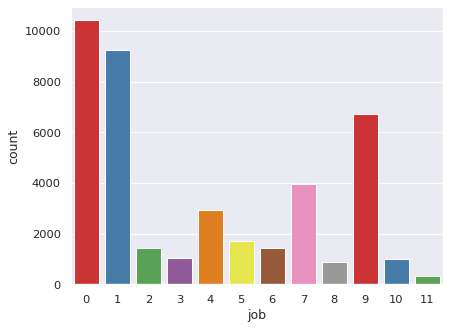

In [199]:
sns.barplot(x=job_df.index, y=job_df['count'], palette='Set1');

In [200]:
# Checking the count per category

age_df = pd.DataFrame(bank_cust['age_bin'].value_counts())

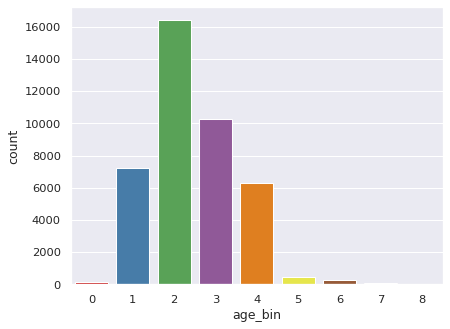

In [205]:
sns.barplot(x=age_df.index, y=age_df['count'],palette='Set1');

## Using K-Mode with "Cao" initialization

In [206]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(bank_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5322, cost: 192203.0
Run 1, iteration: 2/100, moves: 1160, cost: 192203.0


In [207]:
# Predicted Clusters
fitClusters_cao

array([1, 1, 0, ..., 0, 1, 0], dtype=uint16)

In [208]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = bank_cust.columns

In [209]:
# Mode of the clusters
clusterCentroidsDf

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,0,1,6,0,2,0,0,6,2,1,2
1,1,1,3,0,0,0,1,6,0,1,3


## Using K-Mode with "Huang" initialization

In [210]:
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(bank_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7753, cost: 197428.0
Run 1, iteration: 2/100, moves: 1421, cost: 197428.0


In [211]:
# Predicted clusters
fitClusters_huang

array([0, 0, 0, ..., 1, 0, 1], dtype=uint16)

## Choosing K by comparing Cost against each K

In [212]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(bank_cust)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 216952.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5322, cost: 192203.0
Run 1, iteration: 2/100, moves: 1160, cost: 192203.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4993, cost: 185138.0
Run 1, iteration: 2/100, moves: 1368, cost: 185138.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6186, cost: 179774.0
Run 1, iteration: 2/100, moves: 1395, cost: 179774.0


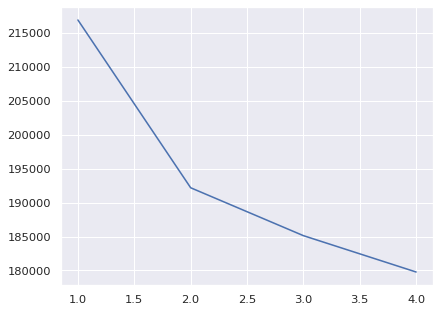

In [213]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost);

In [214]:
## Choosing K=2

km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(bank_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5322, cost: 192203.0
Run 1, iteration: 2/100, moves: 1160, cost: 192203.0


## Combining the predicted clusters with the original DF.

In [215]:
bank_cust = bank_cust.reset_index()
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([bank_cust, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [216]:
combinedDf.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin,cluster_predicted
0,3,1,0,0,0,0,1,6,1,1,4,1
1,7,1,3,1,0,0,1,6,1,1,4,1
2,7,1,3,0,2,0,1,6,1,1,2,0
3,0,1,1,0,0,0,1,6,1,1,2,0
4,7,1,3,0,0,2,1,6,1,1,4,1


In [218]:
combinedDf.cluster_predicted.value_counts()

,count
cluster_predicted,
0,28293
1,12895


In [219]:
# Data for Cluster1

cluster1 = combinedDf[combinedDf.cluster_predicted==1]

In [220]:
# Data for Cluster0

cluster0 = combinedDf[combinedDf.cluster_predicted==0]

In [221]:
cluster1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12895 entries, 0 to 41186
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   job                12895 non-null  int64 
 1   marital            12895 non-null  int64 
 2   education          12895 non-null  int64 
 3   default            12895 non-null  int64 
 4   housing            12895 non-null  int64 
 5   loan               12895 non-null  int64 
 6   contact            12895 non-null  int64 
 7   month              12895 non-null  int64 
 8   day_of_week        12895 non-null  int64 
 9   poutcome           12895 non-null  int64 
 10  age_bin            12895 non-null  int64 
 11  cluster_predicted  12895 non-null  uint16
dtypes: int64(11), uint16(1)
memory usage: 1.2 MB


In [222]:
cluster0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28293 entries, 2 to 41187
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   job                28293 non-null  int64 
 1   marital            28293 non-null  int64 
 2   education          28293 non-null  int64 
 3   default            28293 non-null  int64 
 4   housing            28293 non-null  int64 
 5   loan               28293 non-null  int64 
 6   contact            28293 non-null  int64 
 7   month              28293 non-null  int64 
 8   day_of_week        28293 non-null  int64 
 9   poutcome           28293 non-null  int64 
 10  age_bin            28293 non-null  int64 
 11  cluster_predicted  28293 non-null  uint16
dtypes: int64(11), uint16(1)
memory usage: 2.6 MB


In [223]:
# Checking the count per category for JOB

job1_df = pd.DataFrame(cluster1['job'].value_counts())
job0_df = pd.DataFrame(cluster0['job'].value_counts())

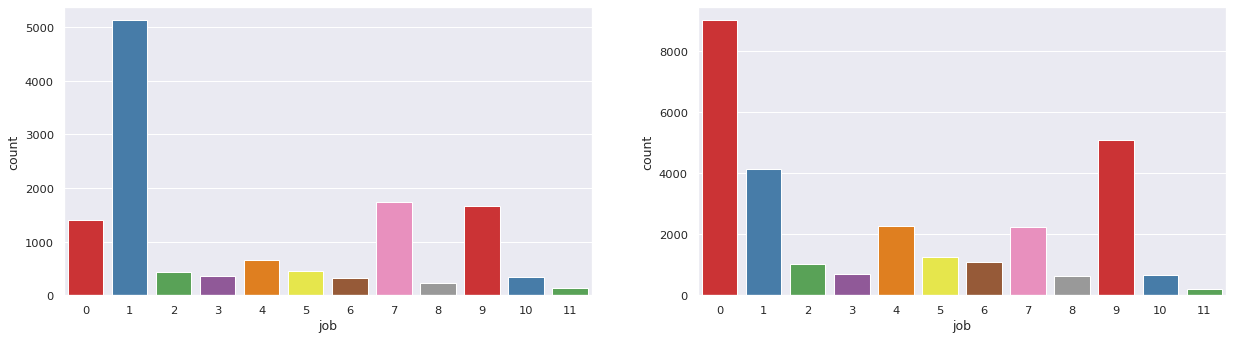

In [226]:
fig, ax =plt.subplots(1,2,figsize=(20,5))
sns.barplot(x=job1_df.index, y=job1_df['count'], ax=ax[0] , palette = 'Set1')
sns.barplot(x=job0_df.index, y=job0_df['count'], ax=ax[1], palette = 'Set1')
fig.show()

In [227]:
age1_df = pd.DataFrame(cluster1['age_bin'].value_counts())
age0_df = pd.DataFrame(cluster0['age_bin'].value_counts())

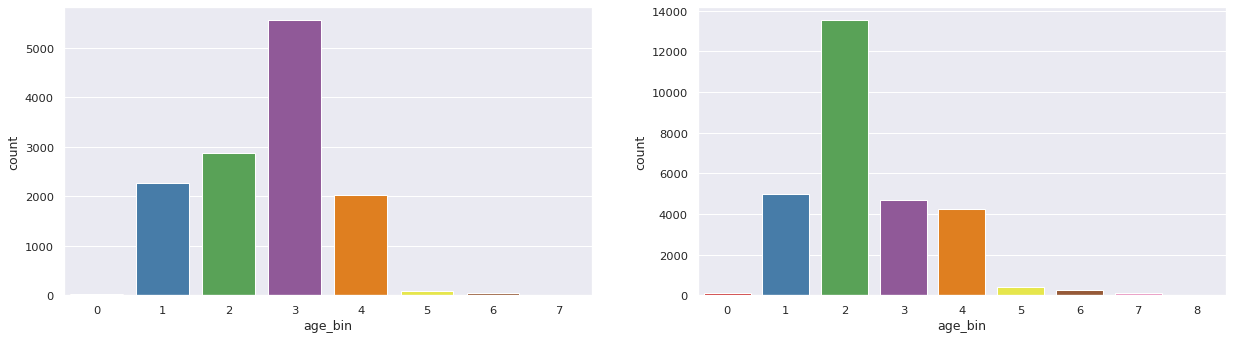

In [228]:
fig, ax =plt.subplots(1,2,figsize=(20,5))
sns.barplot(x=age1_df.index, y=age1_df['count'], ax=ax[0],palette='Set1')
sns.barplot(x=age0_df.index, y=age0_df['count'], ax=ax[1],palette='Set1')
fig.show()

In [229]:
marital1_df = pd.DataFrame(cluster1['marital'].value_counts())
marital0_df = pd.DataFrame(cluster0['marital'].value_counts())

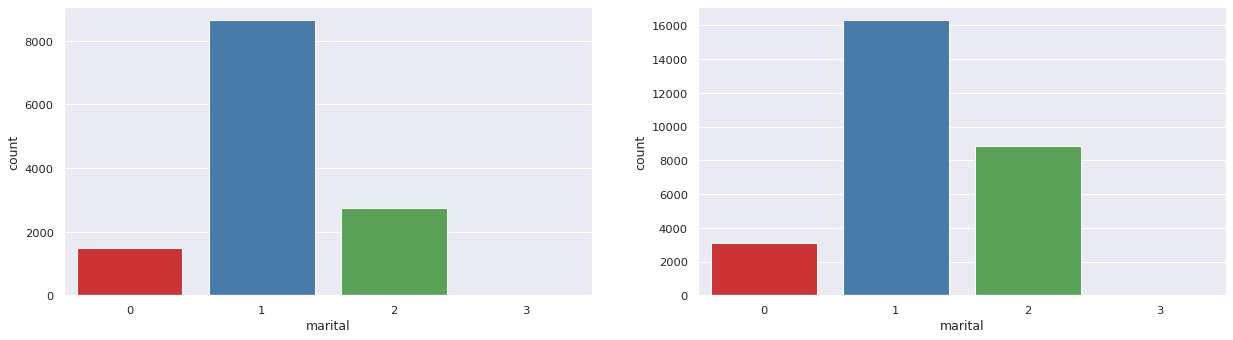

In [230]:
fig, ax =plt.subplots(1,2,figsize=(20,5))
sns.barplot(x=marital1_df.index, y=marital1_df['count'], ax=ax[0],palette='Set1')
sns.barplot(x=marital0_df.index, y=marital0_df['count'], ax=ax[1],palette='Set1')
fig.show()

In [231]:
education1_df = pd.DataFrame(cluster1['education'].value_counts())
education0_df = pd.DataFrame(cluster0['education'].value_counts())

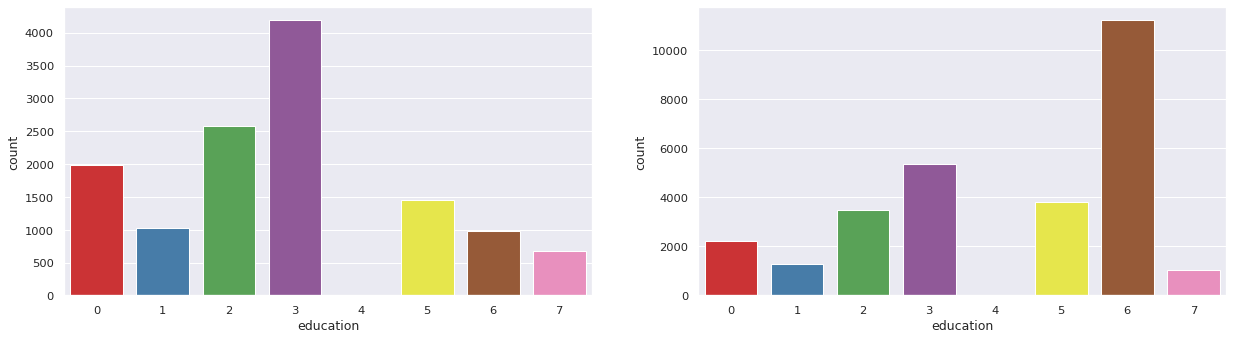

In [232]:
fig, ax =plt.subplots(1,2,figsize=(20,5))
sns.barplot(x=education1_df.index, y=education1_df['count'], ax=ax[0],palette='Set1')
sns.barplot(x=education0_df.index, y=education0_df['count'], ax=ax[1],palette='Set1')
fig.show()